Tensor("ssd_300_vgg/conv5_3/Relu:0", shape=(?, 19, 19, 512), dtype=float32)
Tensor("ssd_300_vgg/pool5/MaxPool:0", shape=(?, 19, 19, 512), dtype=float32)
Tensor("ssd_300_vgg/block4_box/L2Normalization/mul:0", shape=(?, 38, 38, 512), dtype=float32)
Tensor("Const:0", shape=(38, 38, 1), dtype=float32)
Tensor("Const_4:0", shape=(19, 19, 1), dtype=float32)
Tensor("Const_8:0", shape=(10, 10, 1), dtype=float32)
Tensor("Const_12:0", shape=(5, 5, 1), dtype=float32)
Tensor("Const_16:0", shape=(3, 3, 1), dtype=float32)
Tensor("Const_20:0", shape=(1, 1, 1), dtype=float32)
INFO:tensorflow:Restoring parameters from ./ssd_checkpoints/ssd_vgg_300_weights.ckpt


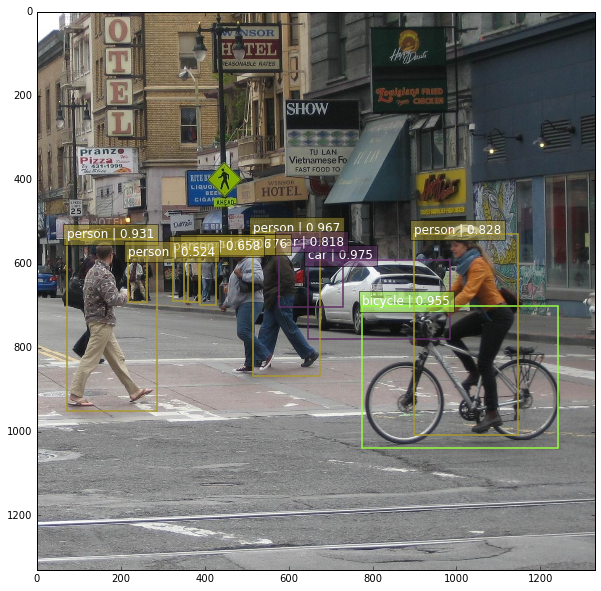

In [1]:
"""
SSD demo
"""

import cv2
import numpy as np
import tensorflow as tf
import matplotlib.image as mpimg

from ssd_300_vgg import SSD
from utils import preprocess_image, process_bboxes
from visualization import plt_bboxes


ssd_net = SSD()
classes, scores, bboxes = ssd_net.detections()
images = ssd_net.images()

sess = tf.Session()
# Restore SSD model.
ckpt_filename =('./ssd_checkpoints/ssd_vgg_300_weights.ckpt') 
sess.run(tf.global_variables_initializer())
saver = tf.train.Saver()
saver.restore(sess, ckpt_filename)

img = cv2.imread("C:/Users/hh/Desktop/Paper_interpretation_and_recode/2.SSD/demo/street.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_prepocessed = preprocess_image(img)
rclasses, rscores, rbboxes = sess.run([classes, scores, bboxes],
                                      feed_dict={images: img_prepocessed})
rclasses, rscores, rbboxes = process_bboxes(rclasses, rscores, rbboxes)

plt_bboxes(img, rclasses, rscores, rbboxes)

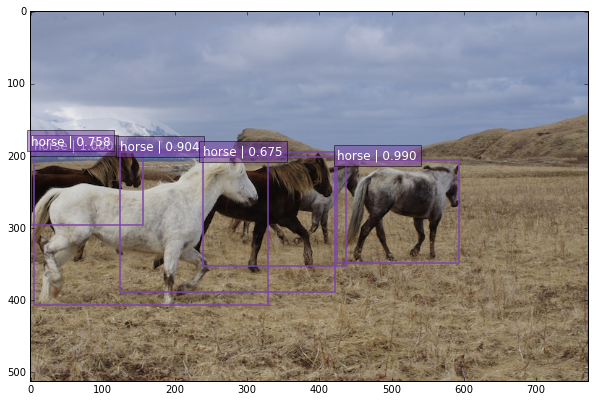

In [2]:
img = cv2.imread("C:/Users/hh/Desktop/Paper_interpretation_and_recode/2.SSD/demo/horses.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_prepocessed = preprocess_image(img)
rclasses, rscores, rbboxes = sess.run([classes, scores, bboxes],
                                      feed_dict={images: img_prepocessed})
rclasses, rscores, rbboxes = process_bboxes(rclasses, rscores, rbboxes)

plt_bboxes(img, rclasses, rscores, rbboxes)

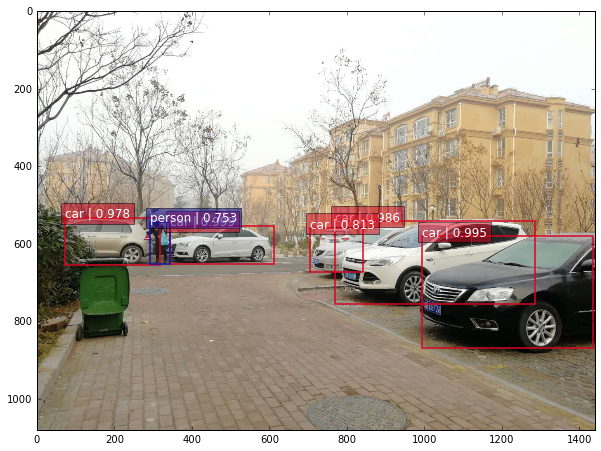

In [3]:
img = cv2.imread("C:/Users/hh/Desktop/Paper_interpretation_and_recode/2.SSD/demo/cars.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_prepocessed = preprocess_image(img)
rclasses, rscores, rbboxes = sess.run([classes, scores, bboxes],
                                      feed_dict={images: img_prepocessed})
rclasses, rscores, rbboxes = process_bboxes(rclasses, rscores, rbboxes)

plt_bboxes(img, rclasses, rscores, rbboxes)